In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [138]:
df=pd.read_csv("train.csv")

In [139]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
df.shape

(891, 12)

In [141]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [142]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [143]:
#Drop unnecessary columns

df.drop(['PassengerId', 'Name', 'Ticket','Embarked','Cabin'],axis=1,inplace=True)

In [144]:
print(df.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object


In [145]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [146]:
# Replace Null Values with median

df['Age']=df['Age'].fillna(df['Age'].median())

In [147]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [157]:
# Encode Sex

le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [158]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [159]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### Feature Selection and Scaling
- **Features (X): Pclass, Sex, Age, SibSp, Parch, Fare**

- **Target (y): Survived**

In [215]:
x=df.drop('Survived',axis=1)
y=df['Survived']

# Scale numerical features
scaler=StandardScaler()
x[['Age','Fare']]=scaler.fit_transform(x[['Age','Fare']])

### Train-Test Split

In [216]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Logistic Regression Model

In [217]:
model=LogisticRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

### Model Evaluation

Accuracy: 0.8100558659217877


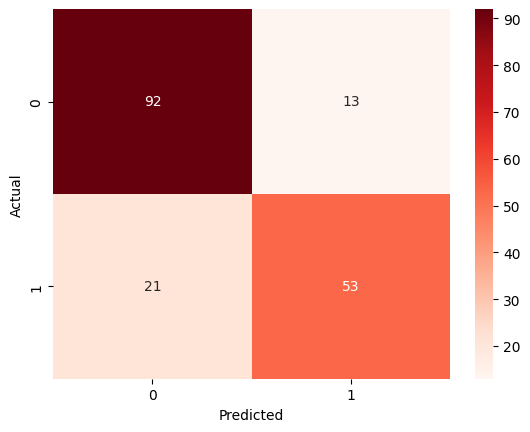

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [218]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


### Exploratory Data Analysis

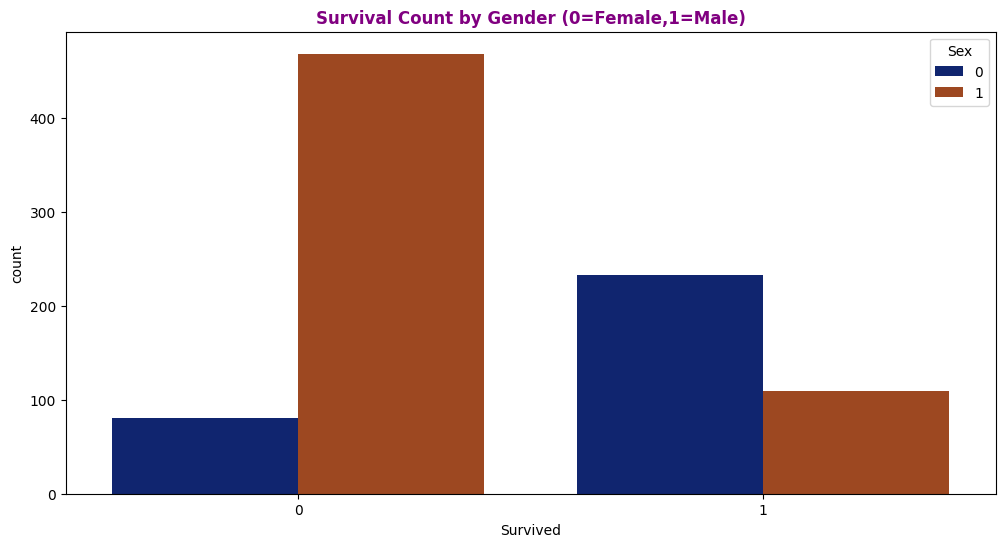

In [219]:
# Survival by Gender
plt.figure(figsize=(12,6))
sns.countplot(x='Survived', hue='Sex', data=df,palette='dark')
plt.title('Survival Count by Gender (0=Female,1=Male)',fontweight='bold',color='purple')
plt.show()




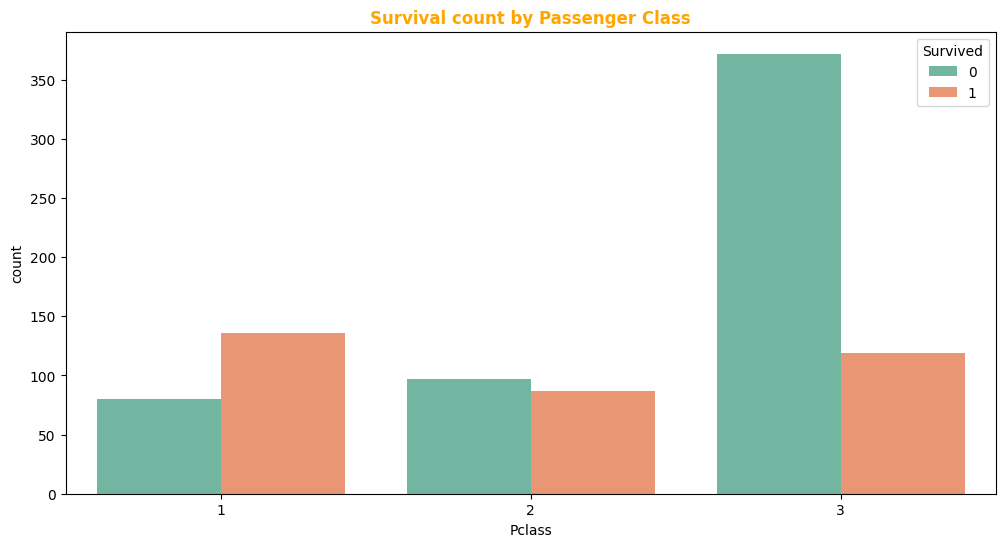

In [220]:
# Survival by Passenger Class
plt.figure(figsize=(12,6))
sns.countplot(x='Pclass', hue='Survived', data=df,palette='Set2')
plt.title("Survival count by Passenger Class",fontweight='bold',color='orange')
plt.show()


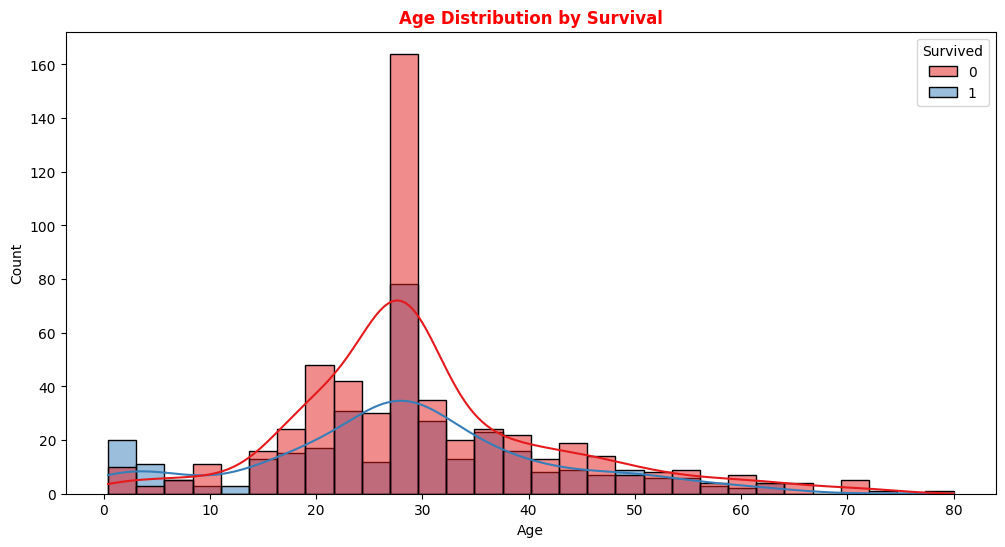

In [221]:
# Age Distribution by Survival
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True,palette='Set1')
plt.title('Age Distribution by Survival',fontweight='bold',color='red')
plt.show()

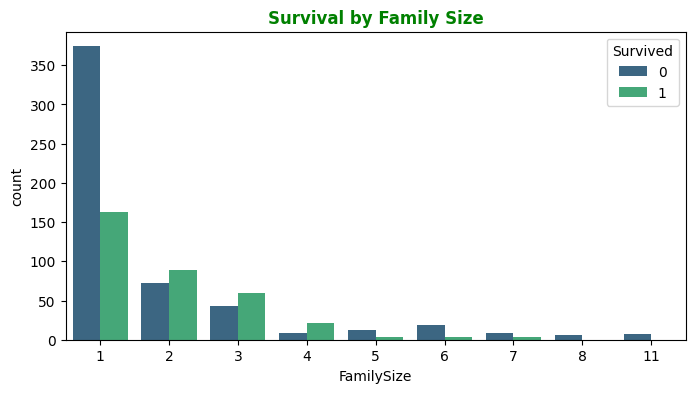

In [222]:
# Family Size effect (SibSp + Parch + 1)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
plt.figure(figsize=(8,4))
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='viridis')
plt.title('Survival by Family Size',fontweight='bold',color='green')
plt.show()